# Get the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
housing=pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Description of the Data

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


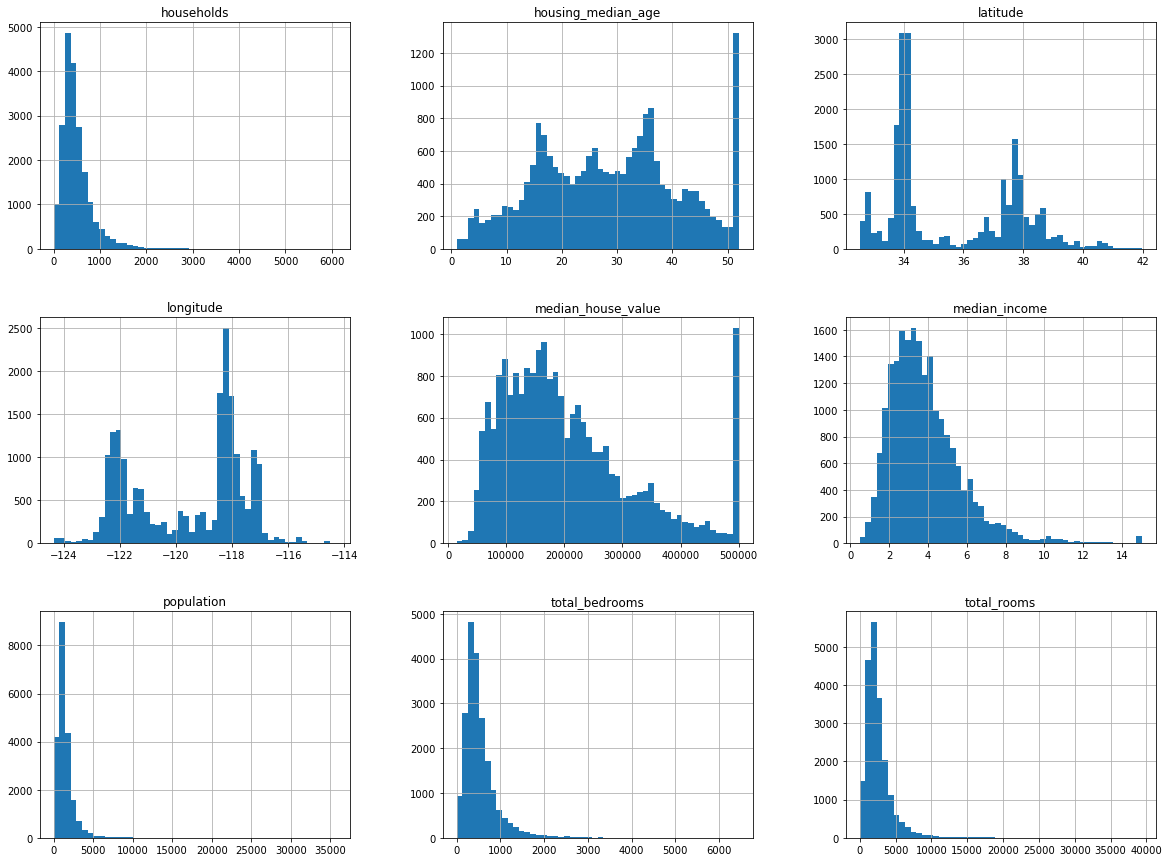

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Create Test set

In [6]:
#Creating income category attribute
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

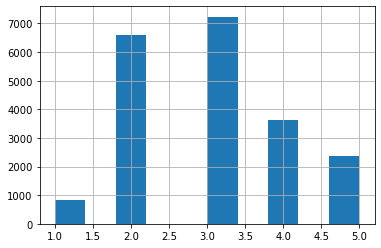

In [7]:
housing['income_cat'].hist()

In [8]:
housing['income_cat'].value_counts().sort_values()

1.0     822
5.0    2362
4.0    3639
2.0    6581
3.0    7236
Name: income_cat, dtype: int64

### Random Sampling

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

### Stratified Sampling

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_indices,test_indices in split.split(housing,housing['income_cat']):
    strat_train_set=housing.iloc[train_indices]
    strat_test_set=housing.iloc[test_indices]

In [11]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

In [12]:
#Creating DataFrame to compare income category proportions in Overall dataset, test set generated with stratified sampling,test set generated using random sampling
compare_props=pd.DataFrame({"Overall":income_cat_proportions(housing),
                           "Stratified":income_cat_proportions(strat_test_set),
                           "Random":income_cat_proportions(test_set)}).sort_index()
compare_props["Random%error"]=100*compare_props["Random"]/compare_props["Overall"]-100
compare_props["Strat%error"]=100*compare_props["Stratified"]/compare_props["Overall"]-100

In [13]:
compare_props

,Overall,Stratified,Random,Random%error,Strat%error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [14]:
#Remove income_cat attribute to bring data back to original state
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

# Visualizing Training Data

In [15]:
#Creating a copy of train set
housing=strat_train_set.copy()

### Visualizing geographical data

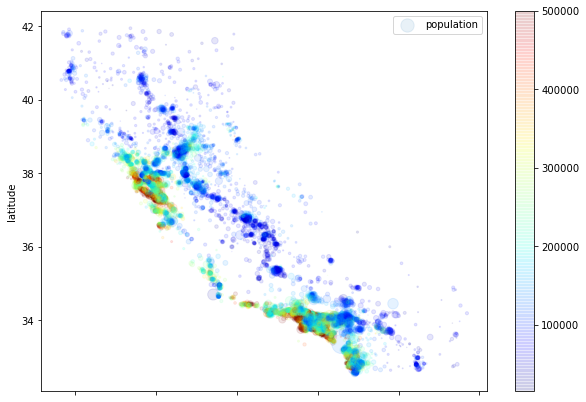

In [16]:
housing.plot(kind='scatter',x='longitude',y='latitude',
             alpha=0.1,s=housing['population']/100,c=housing['median_house_value'],
             figsize=(10,7),label='population',cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

Radius of each circle represents the district population and  color represents price

Using predefined cmap called jet which ranges from blue(low prices) to red(high prices)

Housing prices are very much related to location and population density

### Looking for Correlations

In [17]:
#Computing standard correlation coefficient/Pearson's r between every pair of attributes using corr() method
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [18]:
#Correlation between median_house_value and rest of attributes
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

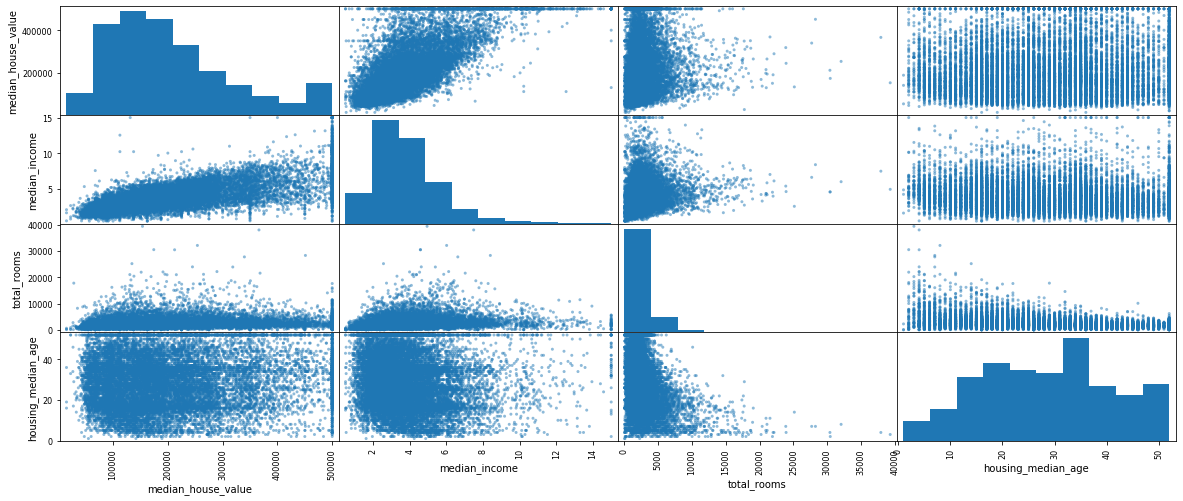

In [19]:
#Using scatter_matrix to plot attributes closely correlated with median housing value
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(20,8))
plt.show

The plot median_income vs median_house_value reveals that they are strongly correlated

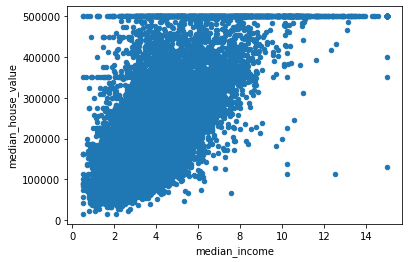

In [20]:
housing.plot(kind='scatter',x='median_income',y='median_house_value')

### Experimenting with attribute combinations

In [21]:
#Creating additional attributes and checking dependency of house value on new attributes
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [22]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

bedrooms_per_rooms attribute is strongly correlated with median_house_value. Houses with lower bedroom/room ratio are more expensive
rooms_per_household attribute is also positively correlated. Larger the houses, the more expensive they are.

# Preparing Data for ML algorithms

### Seperate predictors and labels

In [23]:
#Seperating Target and dependency attributes from training set
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [24]:
incomplete_rows=housing[housing.isnull().any(axis=1)].head()
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [25]:
#Create Imputer instance
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [26]:
#Removing text attributes since Imputer works only on numerical data
housing_num=housing.drop('ocean_proximity',axis=1)

In [27]:
#Fit imputer instance to training data
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [29]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
#Replacing missing values by learned medians
X=imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [31]:
#Create Pandas DataFrame
housing_clean=pd.DataFrame(X,columns=housing_num.columns,index=housing.index)

In [32]:
housing_clean.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


### Dealing with Text attribute

In [33]:
housing_cat=housing[['ocean_proximity']]

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Create custom Tranformer to add extra attributes

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [38]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [39]:
housing_extra_attribs=pd.DataFrame(housing_extra_attribs,
                                   columns=list(housing.columns)+['rooms_per_household','population_per_household'],
                                   index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [40]:
#Defining pipeline to deal with numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
        ('std_scaler', StandardScaler()),
    ])

In [41]:
from sklearn.compose import ColumnTransformer

### Defining Pipeline to prepare data(Numerical,Categorical attributes)

In [42]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [43]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
housing_prepared.shape

(16512, 15)

# Training and Evaluating on Training set

### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
from sklearn.model_selection import cross_val_score
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [46]:
def display(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [47]:
display(lin_rmse_scores)

Scores: [67466.11725508 67233.67630695 68224.22888082 74721.95476008
 68420.26897488 71609.58632418 65205.74735009 68686.9304607
 72262.5140762  68112.28697795]
Mean: 69194.33113669128
Standard Deviation: 2674.136569478263


### Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
tree_scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-tree_scores)
display(tree_rmse_scores)

Scores: [68961.93078426 69484.00378507 70366.38631042 70255.71256971
 71245.31754693 72939.46957808 70923.38248732 71505.14242188
 75303.34432592 67790.59464373]
Mean: 70877.52844533174
Standard Deviation: 2003.9766740740745


### Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display(forest_rmse_scores)

Scores: [49474.43308065 47278.27512215 49566.83169382 52255.33237363
 49664.68119189 53517.52128004 49161.97344146 47790.17816391
 52861.1876144  50131.54090294]
Mean: 50170.19548648919
Standard Deviation: 1973.4030011857415


### Fine Tuning Model

#### Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    #combinations of hyperparameters with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# training across 5 folds
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65024.47660978679 {'max_features': 2, 'n_estimators': 3}
55369.58978707593 {'max_features': 2, 'n_estimators': 10}
52731.776536992475 {'max_features': 2, 'n_estimators': 30}
58623.47382079766 {'max_features': 4, 'n_estimators': 3}
52378.443485146185 {'max_features': 4, 'n_estimators': 10}
49915.83301453051 {'max_features': 4, 'n_estimators': 30}
58073.52955246902 {'max_features': 6, 'n_estimators': 3}
51649.66912253651 {'max_features': 6, 'n_estimators': 10}
49646.50294423546 {'max_features': 6, 'n_estimators': 30}
57472.01873934156 {'max_features': 8, 'n_estimators': 3}
51544.15086663861 {'max_features': 8, 'n_estimators': 10}
49785.394663324856 {'max_features': 8, 'n_estimators': 30}
62702.100868011206 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54548.25859526867 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60336.27046883448 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51884.13018796243 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [52]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [53]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Randomized Search

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [55]:
cvresr = rnd_search.cv_results_
for mean_score, params in zip(cvresr["mean_test_score"], cvresr["params"]):
    print(np.sqrt(-mean_score), params)

48674.494176227934 {'max_features': 7, 'n_estimators': 180}
50385.388074239265 {'max_features': 5, 'n_estimators': 15}
50038.274115389526 {'max_features': 3, 'n_estimators': 72}
49797.21638435765 {'max_features': 5, 'n_estimators': 21}
48850.051182500196 {'max_features': 7, 'n_estimators': 122}
50020.22732186308 {'max_features': 3, 'n_estimators': 75}
49976.77970304856 {'max_features': 3, 'n_estimators': 88}
48871.43494723857 {'max_features': 5, 'n_estimators': 100}
49873.1996512147 {'max_features': 3, 'n_estimators': 150}
62126.424275011974 {'max_features': 5, 'n_estimators': 2}


In [56]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [57]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Importance scores of each attribute

In [58]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.84244454e-02, 7.24317252e-02, 4.35879388e-02, 1.75742511e-02,
       1.65846711e-02, 1.70297662e-02, 1.64660275e-02, 3.65446117e-01,
       8.17995462e-02, 1.11928073e-01, 9.55264017e-03, 1.62386643e-01,
       8.31418544e-05, 3.20817448e-03, 3.49683950e-03])

In [59]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3654461173026625, 'median_income'),
 (0.1623866425849517, '<1H OCEAN'),
 (0.11192807264803414, 'population_per_household'),
 (0.08179954621581069, 'rooms_per_household'),
 (0.07842444540780269, 'longitude'),
 (0.0724317251843439, 'latitude'),
 (0.043587938792170704, 'housing_median_age'),
 (0.017574251083627285, 'total_rooms'),
 (0.017029766196714983, 'population'),
 (0.01658467108554444, 'total_bedrooms'),
 (0.016466027488271393, 'households'),
 (0.009552640171219026, 'bedrooms_per_room'),
 (0.0034968395005622235, 'NEAR BAY'),
 (0.0032081744838927395, 'ISLAND'),
 (8.314185439160123e-05, 'INLAND')]

# Evaluate final model on Test set

In [60]:
from sklearn.metrics import mean_squared_error
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [61]:
final_rmse

46667.89209774041

#### Computing 95% confidence interval for test rmse

In [62]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([44708.73221798, 48548.05422624])

### Pipeline with preperation and prediction

In [63]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("final_model", rnd_search.best_estimator_)])

In [64]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [65]:
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([269446.67222222, 328850.01111111, 215921.11111111,  50302.77777778,
       227220.        ])

In [66]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


### Saving Model using joblib

In [67]:
my_model = full_pipeline_with_predictor

In [68]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")

['my_model.pkl']

In [69]:
#my_model_loaded = joblib.load("my_model.pkl")